In [1]:
##This part of the code is reproduced from https://github.com/harvitronix/five-video-classification-methods, authored by Matt Harvey##
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from models import ResearchModels
from data import DataSet
import time
import os.path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def train(data_type, seq_length, model, saved_model=None,
          class_limit=None, image_shape=None,
          load_to_memory=False, batch_size=32, nb_epoch=100):
    # Helper: Save the model.
    checkpointer = ModelCheckpoint(
        filepath=os.path.join('data', 'checkpoints', model + '-' + data_type + \
            '.{epoch:03d}-{val_loss:.3f}.hdf5'),
        verbose=1,
        save_best_only=False)

    # Helper: TensorBoard
    tb = TensorBoard(log_dir=os.path.join('data', 'logs', model))

    # Helper: Stop when we stop learning.
    early_stopper = EarlyStopping(patience=5)

    # Helper: Save results.
    timestamp = time.time()
    csv_logger = CSVLogger(os.path.join('data', 'logs', model + '-' + 'training-' + \
        str(timestamp) + '.log'))

    # Get the data and process it.
    if image_shape is None:
        data = DataSet(
            seq_length=seq_length,
            class_limit=class_limit
        )
    else:
        data = DataSet(
            seq_length=seq_length,
            class_limit=class_limit,
            image_shape=image_shape
        )

    # Get samples per epoch.
    # Multiply by 0.7 to attempt to guess how much of data.data is the train set.
    steps_per_epoch = (len(data.data) * 0.7) // batch_size

    
        # Get data.
    X, y = data.get_all_sequences_in_memory('train', data_type)
    X_test, y_test = data.get_all_sequences_in_memory('test', data_type)

    # Get the model.
    rm = ResearchModels(len(data.classes), model, seq_length, saved_model)

        # Use standard fit.
    history = rm.model.fit(
            X,
            y,
            batch_size=batch_size,
            validation_data=(X_test, y_test),
            verbose=1,
            callbacks=[tb, early_stopper, csv_logger, checkpointer],
            epochs=nb_epoch)
    
    print(history.history.keys())
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
model = 'lrcn'
saved_model = None  # None or weights file
class_limit = 5  # int, can be 1-101 or None
seq_length = 40
load_to_memory = True  # pre-load the sequences into memory
batch_size = 32
nb_epoch = 80

In [4]:
if model in ['conv_3d', 'c3d', 'lrcn']:
    data_type = 'images'
    image_shape = (80, 80, 3)
elif model in ['lstm', 'mlp']:
    data_type = 'features'
    image_shape = None
else:
    raise ValueError("Invalid model. See train.py for options.")

Loading 29 samples into memory for training.
Loading 14 samples into memory for testing.
Loading CNN-LSTM model.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 40, 40, 40, 32)    4736      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 38, 38, 32)    9248      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 40, 19, 19, 32)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 40, 19, 19, 64)    18496     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 40, 19, 19, 64)    36928     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 40, 9, 9, 64)      0         
_____________________________

29/29 [==============================] - 13s 444ms/step - loss: 1.6041 - acc: 0.3793 - val_loss: 1.6074 - val_acc: 0.2857

Epoch 00026: saving model to data/checkpoints/lrcn-images.026-1.607.hdf5
Epoch 27/80
29/29 [==============================] - 12s 430ms/step - loss: 1.6043 - acc: 0.2069 - val_loss: 1.6074 - val_acc: 0.2857

Epoch 00027: saving model to data/checkpoints/lrcn-images.027-1.607.hdf5
Epoch 28/80
29/29 [==============================] - 12s 419ms/step - loss: 1.6028 - acc: 0.2414 - val_loss: 1.6073 - val_acc: 0.2857

Epoch 00028: saving model to data/checkpoints/lrcn-images.028-1.607.hdf5
Epoch 29/80
29/29 [==============================] - 12s 424ms/step - loss: 1.5984 - acc: 0.3103 - val_loss: 1.6072 - val_acc: 0.2857

Epoch 00029: saving model to data/checkpoints/lrcn-images.029-1.607.hdf5
Epoch 30/80
29/29 [==============================] - 13s 450ms/step - loss: 1.6014 - acc: 0.2759 - val_loss: 1.6071 - val_acc: 0.2857

Epoch 00030: saving model to data/checkpoints


Epoch 00065: saving model to data/checkpoints/lrcn-images.065-1.599.hdf5
Epoch 66/80
29/29 [==============================] - 13s 454ms/step - loss: 1.5766 - acc: 0.2759 - val_loss: 1.5988 - val_acc: 0.2143

Epoch 00066: saving model to data/checkpoints/lrcn-images.066-1.599.hdf5
Epoch 67/80
29/29 [==============================] - 13s 454ms/step - loss: 1.5659 - acc: 0.3793 - val_loss: 1.5982 - val_acc: 0.2143

Epoch 00067: saving model to data/checkpoints/lrcn-images.067-1.598.hdf5
Epoch 68/80
29/29 [==============================] - 13s 436ms/step - loss: 1.5722 - acc: 0.2414 - val_loss: 1.5977 - val_acc: 0.2143

Epoch 00068: saving model to data/checkpoints/lrcn-images.068-1.598.hdf5
Epoch 69/80
29/29 [==============================] - 13s 446ms/step - loss: 1.5650 - acc: 0.4138 - val_loss: 1.5971 - val_acc: 0.2143

Epoch 00069: saving model to data/checkpoints/lrcn-images.069-1.597.hdf5
Epoch 70/80
29/29 [==============================] - 13s 437ms/step - loss: 1.5627 - acc: 0.34

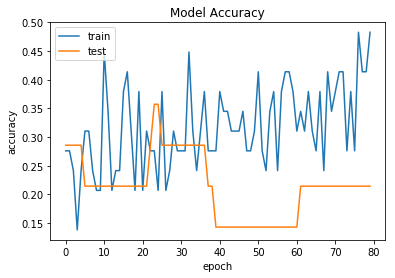

In [5]:
## This part of code is referenced from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ ##
train(data_type, seq_length, model, saved_model=saved_model,class_limit=class_limit, image_shape=image_shape,load_to_memory=load_to_memory, batch_size=batch_size, nb_epoch=nb_epoch)